In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
df = pd.read_csv("/RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
df.shape

(12316, 32)

In [28]:
# Inspect dataset
df.info()
df.columns

# Rename for convenience (optional)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Preview data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   time                         12316 non-null  object
 1   day_of_week                  12316 non-null  object
 2   age_band_of_driver           12316 non-null  object
 3   sex_of_driver                12316 non-null  object
 4   educational_level            11575 non-null  object
 5   vehicle_driver_relation      11737 non-null  object
 6   driving_experience           11487 non-null  object
 7   type_of_vehicle              11366 non-null  object
 8   owner_of_vehicle             11834 non-null  object
 9   service_year_of_vehicle      8388 non-null   object
 10  defect_of_vehicle            7889 non-null   object
 11  area_accident_occured        12077 non-null  object
 12  lanes_or_medians             11931 non-null  object
 13  road_allignment              12

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity,hour,day,time_of_day
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,Wednesday,Evening
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,Wednesday,Evening
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,Wednesday,Evening
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,Wednesday,Night
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,Wednesday,Night


In [11]:
# Check nulls
df.isnull().sum()

,0
time,0
day_of_week,0
age_band_of_driver,0
sex_of_driver,0
educational_level,741
vehicle_driver_relation,579
driving_experience,829
type_of_vehicle,950
owner_of_vehicle,482
service_year_of_vehicle,3928


In [12]:
# Drop rows with nulls in key fields
df.dropna(subset=['accident_severity', 'road_surface_conditions', 'weather_conditions', 'light_conditions'], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

In [16]:
# Ensure 'time' column is clean and in HH:MM format
df['time'] = pd.to_datetime(df['time'], errors='coerce').dt.time

In [17]:
# Create hour column (integer 0–23)
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.hour

# Preview
df[['time', 'hour']].head()

,time,hour
0,17:02:00,17
1,17:02:00,17
2,17:02:00,17
3,01:06:00,1
4,01:06:00,1


In [18]:
def get_time_of_day(hour):
    if pd.isnull(hour):
        return 'Unknown'
    elif 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(get_time_of_day)


/tmp/ipython-input-20-732892869.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='coolwarm')


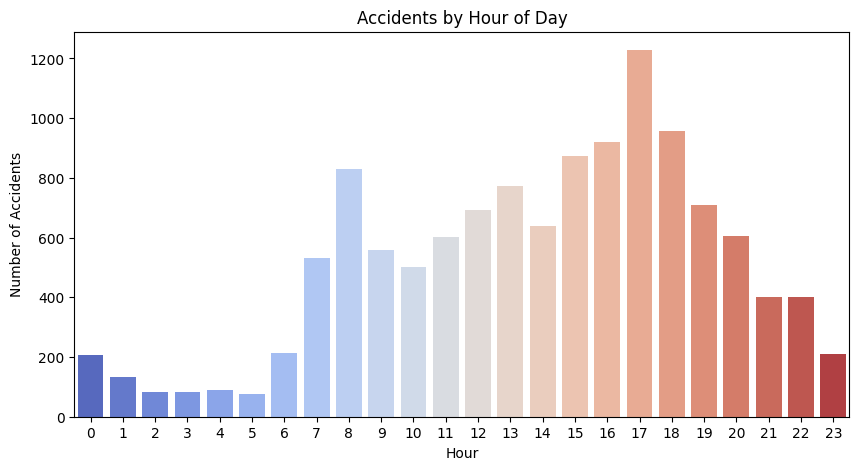

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# By hour
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df, palette='coolwarm')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()

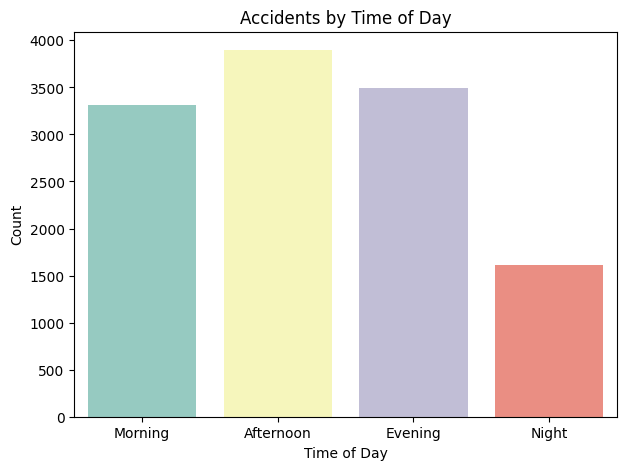

In [21]:
# By time of day
plt.figure(figsize=(7,5))
sns.countplot(x='time_of_day', data=df, order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='Set3')
plt.title("Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-22-1106033143.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='accident_severity', data=df, palette='Set2')


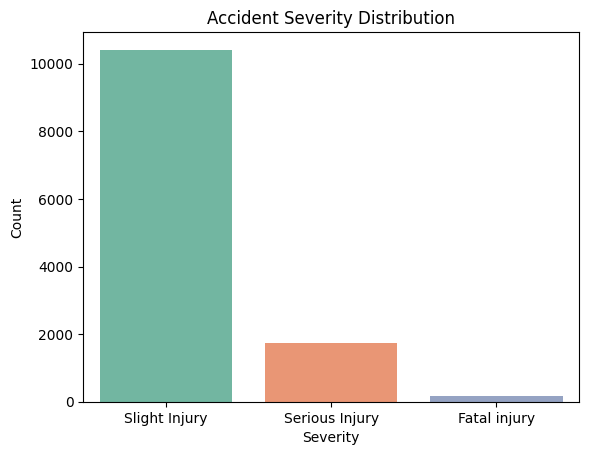

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accident severity distribution
sns.countplot(x='accident_severity', data=df, palette='Set2')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-23-763597274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='road_surface_conditions', data=df, palette='coolwarm')


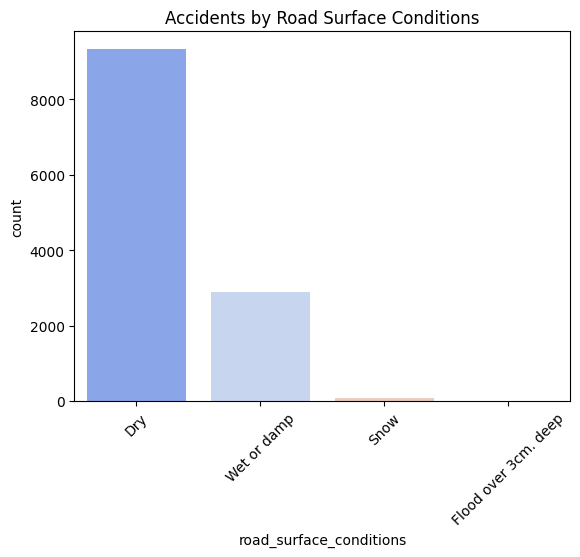

In [23]:
# Road Surface Conditions
sns.countplot(x='road_surface_conditions', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Accidents by Road Surface Conditions')
plt.show()

/tmp/ipython-input-24-2820735060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather_conditions', data=df, palette='magma')


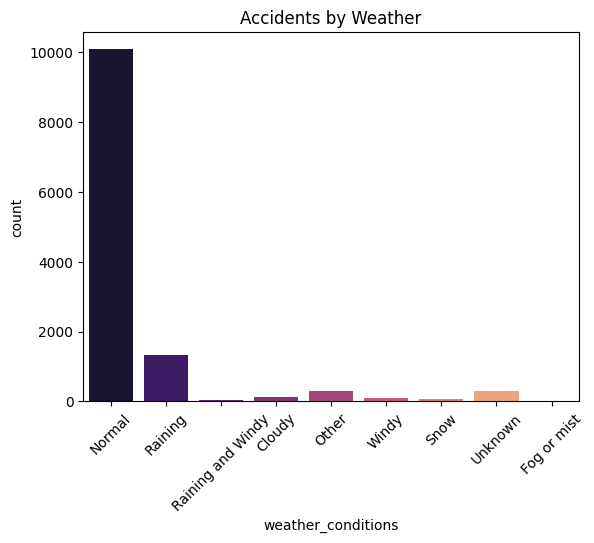

In [24]:
# Weather Conditions
sns.countplot(x='weather_conditions', data=df, palette='magma')
plt.xticks(rotation=45)
plt.title('Accidents by Weather')
plt.show()


/tmp/ipython-input-25-3399222210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='light_conditions', data=df, palette='viridis')


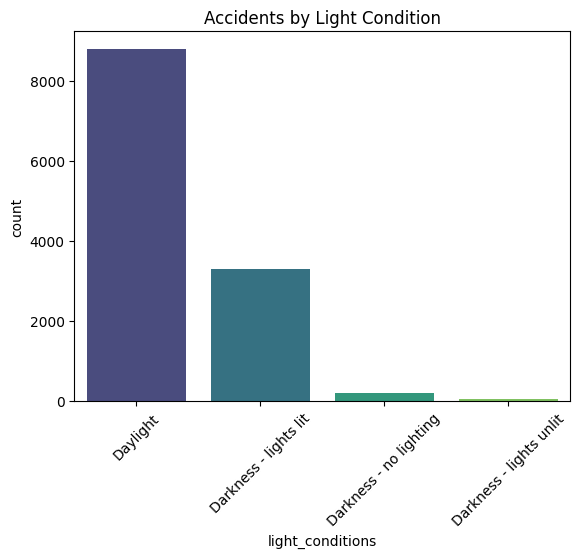

In [25]:
# Light Conditions
sns.countplot(x='light_conditions', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Accidents by Light Condition')
plt.show()

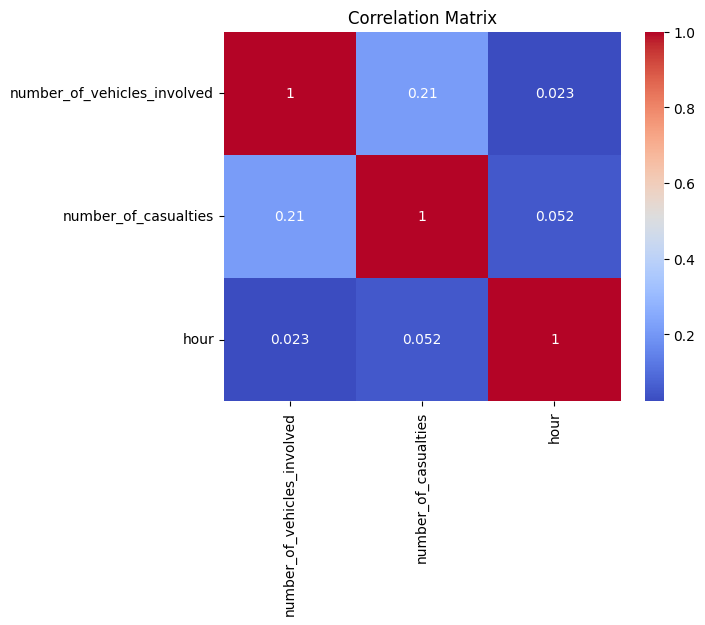

In [26]:
# Correlation heatmap if numeric features exist
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()